# Cristina Venturini 2022461

In [1]:
library(tibble)
library(ggplot2)
library(RConics)
theme_set(theme_bw())

Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

## Exercise 1

A set of measurements have been performed on the concentration of a contaminant in tap water. <br>
The following table reports a set of values ($x$), with the corresponding probabilities given by the two methods ($p1$ and $p2$).

| $$x$$ | 15.58 | 15.9 | 16 | 16.1 | 16.2
| -: | :-: | :-: | :-: | :-: | :-: 
| $$p_1$$ | 0.15 | 0.21 | 0.35 | 0.15 | 0.14
| $$p_2$$ | 0.14 | 0.05 | 0.64 | 0.08 | 0.09

Evaluate the expected values, E[X], and the variance, Var(X), for both methods.

In [2]:
p1 = c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 = c(0.14, 0.05, 0.64, 0.08, 0.09)
x = c(15.58, 15.9, 16, 16.1, 16.2)

In [3]:
ex1 = sum(p1*x)
ex2 = sum(p2*x)
var1 = sum((x - ex1)**2*p1)
var2 = sum((x - ex2)**2*p2)

In [4]:
cat(paste("With method 1 and probability p1 E(X) =", ex1, "and Var(X) =", round(var1, 3), "\n"))
cat(paste("With method 2 and probability p2 E(X) =", ex2, "and Var(X) =", round(var2, 3)))

With method 1 and probability p1 E(X) = 15.959 and Var(X) = 0.034 
With method 2 and probability p2 E(X) = 15.9622 and Var(X) = 0.028

## Exercise 2

The waiting time, in minutes, at the doctor's is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30. 

#### 2.1 Simulate the waiting time for 50 people at the doctor's office and plot the relative histogram

In [5]:
set.seed(1234)
lambda = 1/30
n = 50
wait = tibble('wait' = rexp(n, lambda))

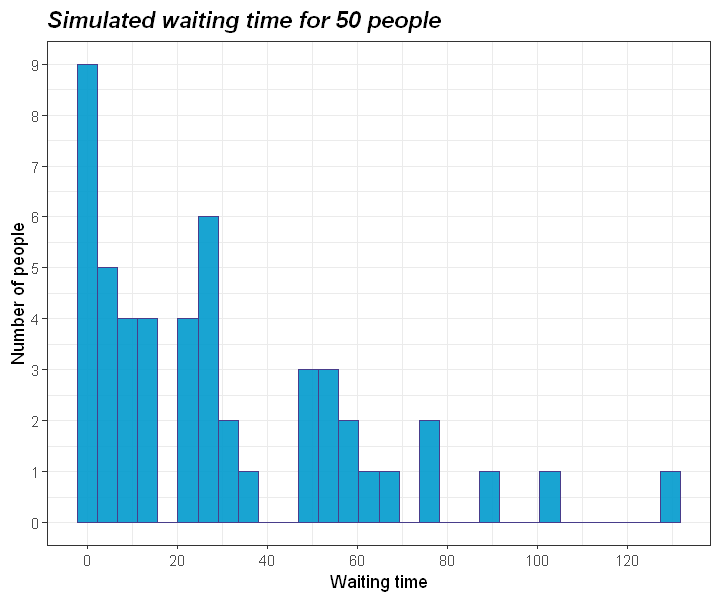

In [6]:
options(repr.plot.width=6, repr.plot.height=5)
ggplot(wait, aes(x=wait)) + geom_histogram(bins=30, colour='darkslateblue', fill='deepskyblue3', alpha=0.9) + 
ggtitle("Simulated waiting time for 50 people") + ylab("Number of people") + xlab("Waiting time")+
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + scale_y_continuous(breaks = scales::pretty_breaks(n = 10)) +
theme(plot.title = element_text(color="black", size=14, face="bold.italic"), 
      axis.title.x = element_text(color="black", size=11),
      axis.title.y = element_text(color="black", size=11))

#### 2.2 What is the probability that a person will wait for less than 10 minutes ?

In [7]:
cat(paste("The probability that a person will wait for less than 10 minutes is", round(pexp(10, lambda), 3)))

The probability that a person will wait for less than 10 minutes is 0.283

#### 2.3 Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

In [9]:
x = 0:max(wait)
avg_waiting = mean(wait$wait, trim=0) 
e_waiting = sum(x*dexp(x,lambda))
e_waiting_2 = 1/lambda
dp1 = (avg_waiting - e_waiting)*100/e_waiting
dp2 = (avg_waiting - e_waiting_2)*100/e_waiting_2

In [10]:
cat(paste("Average waiting time from the simulated data:", round(avg_waiting, 4), "\n"))
cat(paste("Expected value from PDF:", round(e_waiting, 4), "(difference of", round(abs(dp1),3), "% from simulated data)", "\n"))
cat(paste("Expected value from theory:", round(e_waiting_2, 4), "(difference of", round(abs(dp2),3), "% from simulated data)"))

Average waiting time from the simulated data: 29.6752 
Expected value from PDF: 27.8689 (difference of 6.482 % from simulated data) 
Expected value from theory: 30 (difference of 1.083 % from simulated data)

#### 2.4 What is the probability for waiting more than one hour before being received ?

In [11]:
cat(paste("The probability that a person will wait more than one hour is", round(1-pexp(60, lambda), 3)))

The probability that a person will wait more than one hour is 0.135

## Exercise 3

Let's suppose that on a book, on average, there is one typo error every three pages. <br>
If the number of errors follows a Poisson distribution, plot the pdf and cdf, and calculate the probability that there is at least one error on a specific page of the book.

In [12]:
lambda2 = 1/3
x = 0:8
pdf_pois = dpois(x, lambda2)
cdf_pois = ppois(x, lambda2)
pois = tibble('x' = x, 'pdf' = pdf_pois, 'cdf' = cdf_pois)

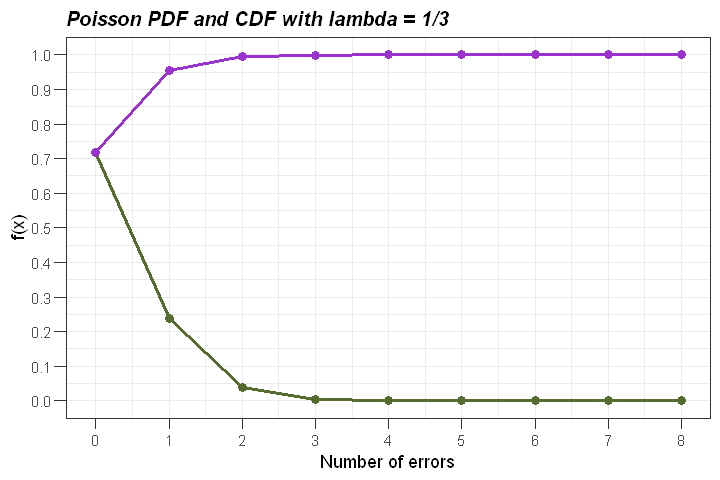

In [13]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(pois, aes(x=x))+geom_line(aes(y=pdf), colour="darkolivegreen", size = 1) + geom_line(aes(y=cdf), colour="darkorchid3", size = 1) + 
geom_point(aes(y=pdf), colour="darkolivegreen", size = 2.3) + geom_point(aes(y=cdf), colour="darkorchid3", size = 2.3)+
labs(title='Poisson PDF and CDF with lambda = 1/3', x='Number of errors', y='f(x)')+ 
scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + scale_y_continuous(breaks = scales::pretty_breaks(n = 10)) +
theme(plot.title = element_text(color="black", size=12, face="bold.italic"), 
      axis.title.x = element_text(color="black", size=11),
      axis.title.y = element_text(color="black", size=11), 
      axis.ticks.length=unit(.25, "cm"),
      axis.text.x = element_text(size=9),
      axis.text.y = element_text(size=9))

In [14]:
cat(paste("The probability that there is at least one error on a specific page of the book is",round(1-pdf_pois[1],2)))

The probability that there is at least one error on a specific page of the book is 0.28

## Exercise 4

We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. <br>
Calculate the probability that at least 10 draws are needed.

If $10$ draws are needed, this means we are considering a minimum of nine failures. <br>
In R, the geometric distribution is expressed with the number of failures needed to get the first success. <br>
To answer the question of the exercise, one could find the cumulative probability of having eight failures (pgeom(8,p)) and then subtract it to $1$, thus obtaining the cumulative probability of having $9$ failures or more, which is exactly the case required by the exercise. <br>
The result can be obtained also by using the negative binomial distribution by using $r = 1$, with $r$ number of successes at the $n^{th}$ trial.

In [15]:
p = 4/52
pr10 = 1 - pgeom(8, p)

In [16]:
cat(paste("The probability that at least 10 draws are needed is", round(pr10, 3)))

The probability that at least 10 draws are needed is 0.487

## Exercise 5

The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form: 
$$ f(X)=   \left\{
\begin{array}{ll}
      c(t - 1)(2 - t) && 1 < t < 2 \\
      0 && otherwise \\
\end{array} 
\right.  
$$
where t is the time in hours.

#### 5.1 Using the integrate() R function, determine the constant c (and verify it analytically)

In [17]:
not_norm_PDF = function(t) {(t-1)*(2-t)}

In [18]:
c = 1/as.numeric(integrate(not_norm_PDF, 1, 2)[1])
c

[1] 6

<img src="r2.png" width=600 height=200 />

By solving the integral analitycally, one obtains a value of $\frac{1}{6}$, which means $c=6$. This is in agreement with the value obtained with the function integrate, which yields a value $c=6$.

This means that the PDF after normalization is: 
$$ f(X)=   \left\{
\begin{array}{ll}
      6(t - 1)(2 - t) && 1 < t < 2 \\
      0 && otherwise \\
\end{array} 
\right.  
$$
and the CDF, obtained by integrating the PDF from 1 to t, is: 
$$ F(X)=   \left\{
\begin{array}{lll}
      0 && t<1 \\
      9t^2-2t^3-12t+5 && 1 < t < 2 \\
      1 && t>2 \\
\end{array} 
\right.  
$$



#### 5.2 Write the set of four R functions and plot the pdf and cdf, respectively

In [19]:
dfunc = function(t) {pdf = ifelse(1<t & t<2, 6*(t-1)*(2-t), 0)
                     return(pdf)
                     }

pfunc = function(t){cdf = ifelse(t<1, 0, ifelse(1<=t & t<=2, 9*t^2-2*t^3-12*t+5, 1))
                    return(cdf)
                    }


 
rfunc = function(n){
    t_list = c()
    u = runif(n)
    for (i in 1:n){
        roots = Re(cubic(c(-2,9,-12,5-u[i])))
        t_list[i] = roots[1<roots & roots<2]}
    return (t_list)}

qfunc = function(q){
    q_list = c()
    for (i in 1:length(q)){
        roots = Re(cubic(c(-2,9,-12,5-q[i])))
        q_list[i] = roots[1<roots & roots<2]}
    return (q_list)}

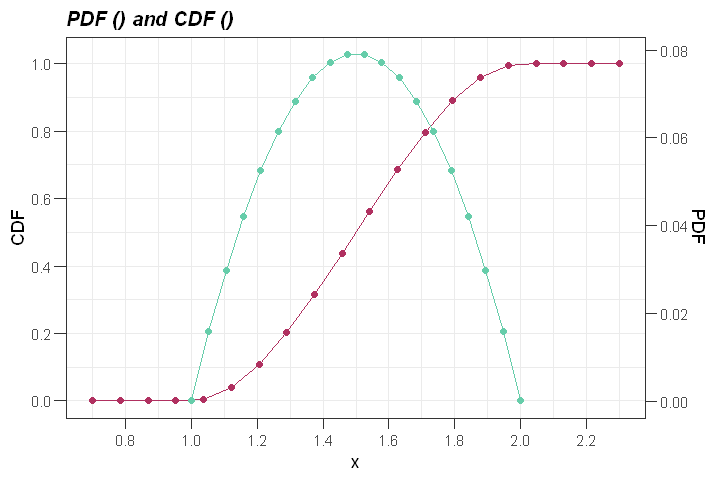

In [20]:
options(repr.plot.width=6, repr.plot.height=4)

xp = seq(1,2,length.out=20)
xc <- seq(0.7,2.3,length.out=20)
pdf <- dfunc(xp)/sum(dfunc(xp))*13
cdf <- pfunc(xc)

plots = tibble('xp' = xp, 'yp' = pdf, 'xc' = xc, 'yc' = cdf)

ggplot(plots) + geom_point(aes(xc, yc), colour = 'maroon') + geom_line(aes(xc, yc), colour = 'maroon')+ 
geom_point(aes(xp, yp),colour = 'aquamarine3') + geom_line(aes(xp, yp), colour = 'aquamarine3')+
scale_y_continuous(name = "CDF",sec.axis = sec_axis( trans=~./13, name="PDF"), breaks = scales::pretty_breaks(n = 8))+
labs(title='PDF () and CDF ()', x='x')+ 
scale_x_continuous(breaks = scales::pretty_breaks(n = 10))+
theme(plot.title = element_text(color="black", size=12, face="bold.italic"), 
      axis.title.x = element_text(color="black", size=11),
      axis.title.y = element_text(color="black", size=11), 
      axis.ticks.length=unit(.25, "cm"),
      axis.text.x = element_text(size=9),
      axis.text.y = element_text(size=9))

### 5.3 Evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take between 90 and 120 minutes.

In [21]:
cat(paste("The probability that the student will finish the aptitude test in more than 75 minutes is", round(1-pfunc(75/60),3)))

The probability that the student will finish the aptitude test in more than 75 minutes is 0.844

In [22]:
cat(paste("The probability that the student will take the aptitude test in between 90 to 120 minutes is", pfunc(2)-pfunc(90/60)))

The probability that the student will take the aptitude test in between 90 to 120 minutes is 0.5

## Exercise 6

The lifetime of tires sold by an used tires shop is $10^4 \cdot x\ km$, where $x$ is a random variable following the distribution funcion: 
$$ f(X)=   \left\{
\begin{array}{ll}
      \frac{2}{x^2} && 1 < x < 2 \\
      0 && otherwise \\
\end{array} 
\right.  
$$


This PDF is already normalized, the corresponding CDF is:

$$
F(x)=  \left\{
\begin{array}{lll}
        0 && x < 1 \\
        -\frac{2}{x} + 2 && 1 < x < 2  \\
        1 && otherwise \\
\end{array} 
\right. 
$$

### 6.1 Write the set of four R functions and plot the pdf and cdf, respectively

In [23]:
dtir = function(x) {pdf = ifelse(1<x & x<2, 2/x**2, 0)
                     return(pdf)
                     }

ptir = function(x){cdf = ifelse(x<1, 0, ifelse(1<=x & x<=2, -(2/x)+2, 1))
                    return(cdf)
                    }

rtir = function(n){
                    x = 2/(2-runif(n))
                    return (x)
                    }

qtir = function(q){
                    x = 2/(2-runif(n))
                    return (x)
                    }

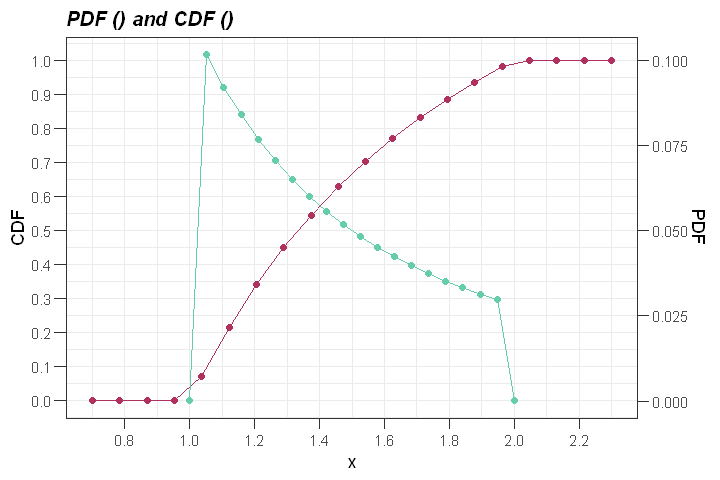

In [24]:
options(repr.plot.width=6, repr.plot.height=4)

xp2 = seq(1,2,length.out=20)
xc2 <- seq(0.7,2.3,length.out=20)
pdf2 <- dtir(xp2)/sum(dtir(xp2))*10
cdf2 <- ptir(xc2)

plots2 = tibble('xp' = xp2, 'yp' = pdf2, 'xc' = xc2, 'yc' = cdf2)

ggplot(plots2) + geom_point(aes(xc, yc), colour = 'maroon') + geom_line(aes(xc, yc), colour = 'maroon')+ 
geom_point(aes(xp, yp),colour = 'aquamarine3') + geom_line(aes(xp, yp), colour = 'aquamarine3')+
scale_y_continuous(name = "CDF",sec.axis = sec_axis( trans=~./10, name="PDF"), breaks = scales::pretty_breaks(n = 8))+
labs(title='PDF () and CDF ()', x='x')+ 
scale_x_continuous(breaks = scales::pretty_breaks(n = 10))+
theme(plot.title = element_text(color="black", size=12, face="bold.italic"), 
      axis.title.x = element_text(color="black", size=11),
      axis.title.y = element_text(color="black", size=11), 
      axis.ticks.length=unit(.25, "cm"),
      axis.text.x = element_text(size=9),
      axis.text.y = element_text(size=9))

### 6.2 Determine the probability that tires will last less than 15000 km

In [25]:
cat('The probability that the tires will last less than 15000 km is', round(ptir(15000/(10^4)),3))

The probability that the tires will last less than 15000 km is 0.667

### 6.3 Sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression Var(X) = E[X^2] - E[X]^2

In [26]:
rv = rtir(3000)

ex = sum(dtir(rv)*rv)/sum(dtir(rv))
ex2 = sum((rv^2)*dtir(rv))/sum(dtir(rv))
varx = ex2 - ex^2

In [29]:
paste('For 3000 random variables sampled from the distribution: E[x] =', round(ex,3), 'and Var(x) =', round(varx,3))

[1] "For 3000 random variables sampled from the distribution: E[x] = 1.289 and Var(x) = 0.061"